# Example Stitching Notebook

In [1]:
import os
from sparcstools.stitch import generate_stitched

In [2]:
input_dir = os.path.join("../../../test_data/example1/raw_image_tiles/")
slidename = "stitching_test"
outdir = os.path.join("../../../test_data/example1/", slidename)

performing stitching with  0.1  overlap.
performing stitching on channel  Alexa488 with id number  0
    quantifying alignment error 1000/1000
    aligning edge 12/12


/Users/sophia/Documents/GitHub/SPARCStools/src/sparcstools/_custom_ashlar_funcs.py:103: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/Users/sophia/Documents/GitHub/SPARCStools/src/sparcstools/_custom_ashlar_funcs.py:107: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


writing results to one large tif.


  0%|          | 0/3 [00:00<?, ?it/s]

        merging tile 9/9

 33%|███▎      | 1/3 [00:01<00:02,  1.07s/it]


        merging tile 9/9

 67%|██████▋   | 2/3 [00:02<00:01,  1.06s/it]


        merging tile 9/9

100%|██████████| 3/3 [00:03<00:00,  1.06s/it]


deleting old variables
cleaning up temp directory /Users/sophia/Documents/GitHub/SPARCStools/test_data/example1/stitching_test/temp_mmap_ga9kimwj.
Merging Pipeline completed in  0.1771675984064738 minutes.


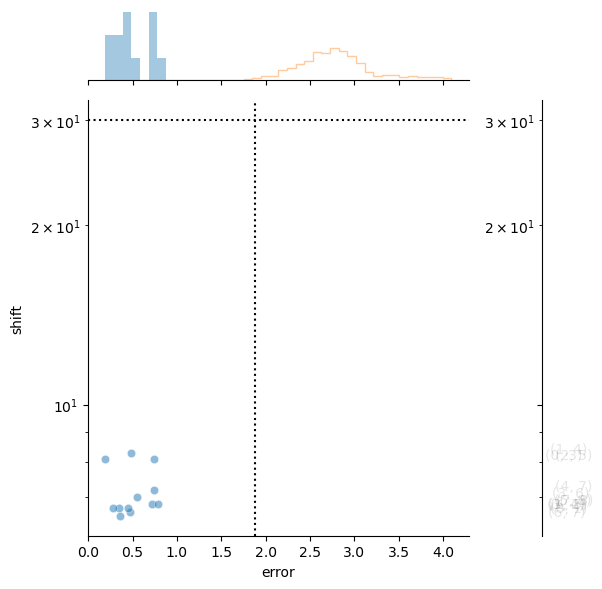

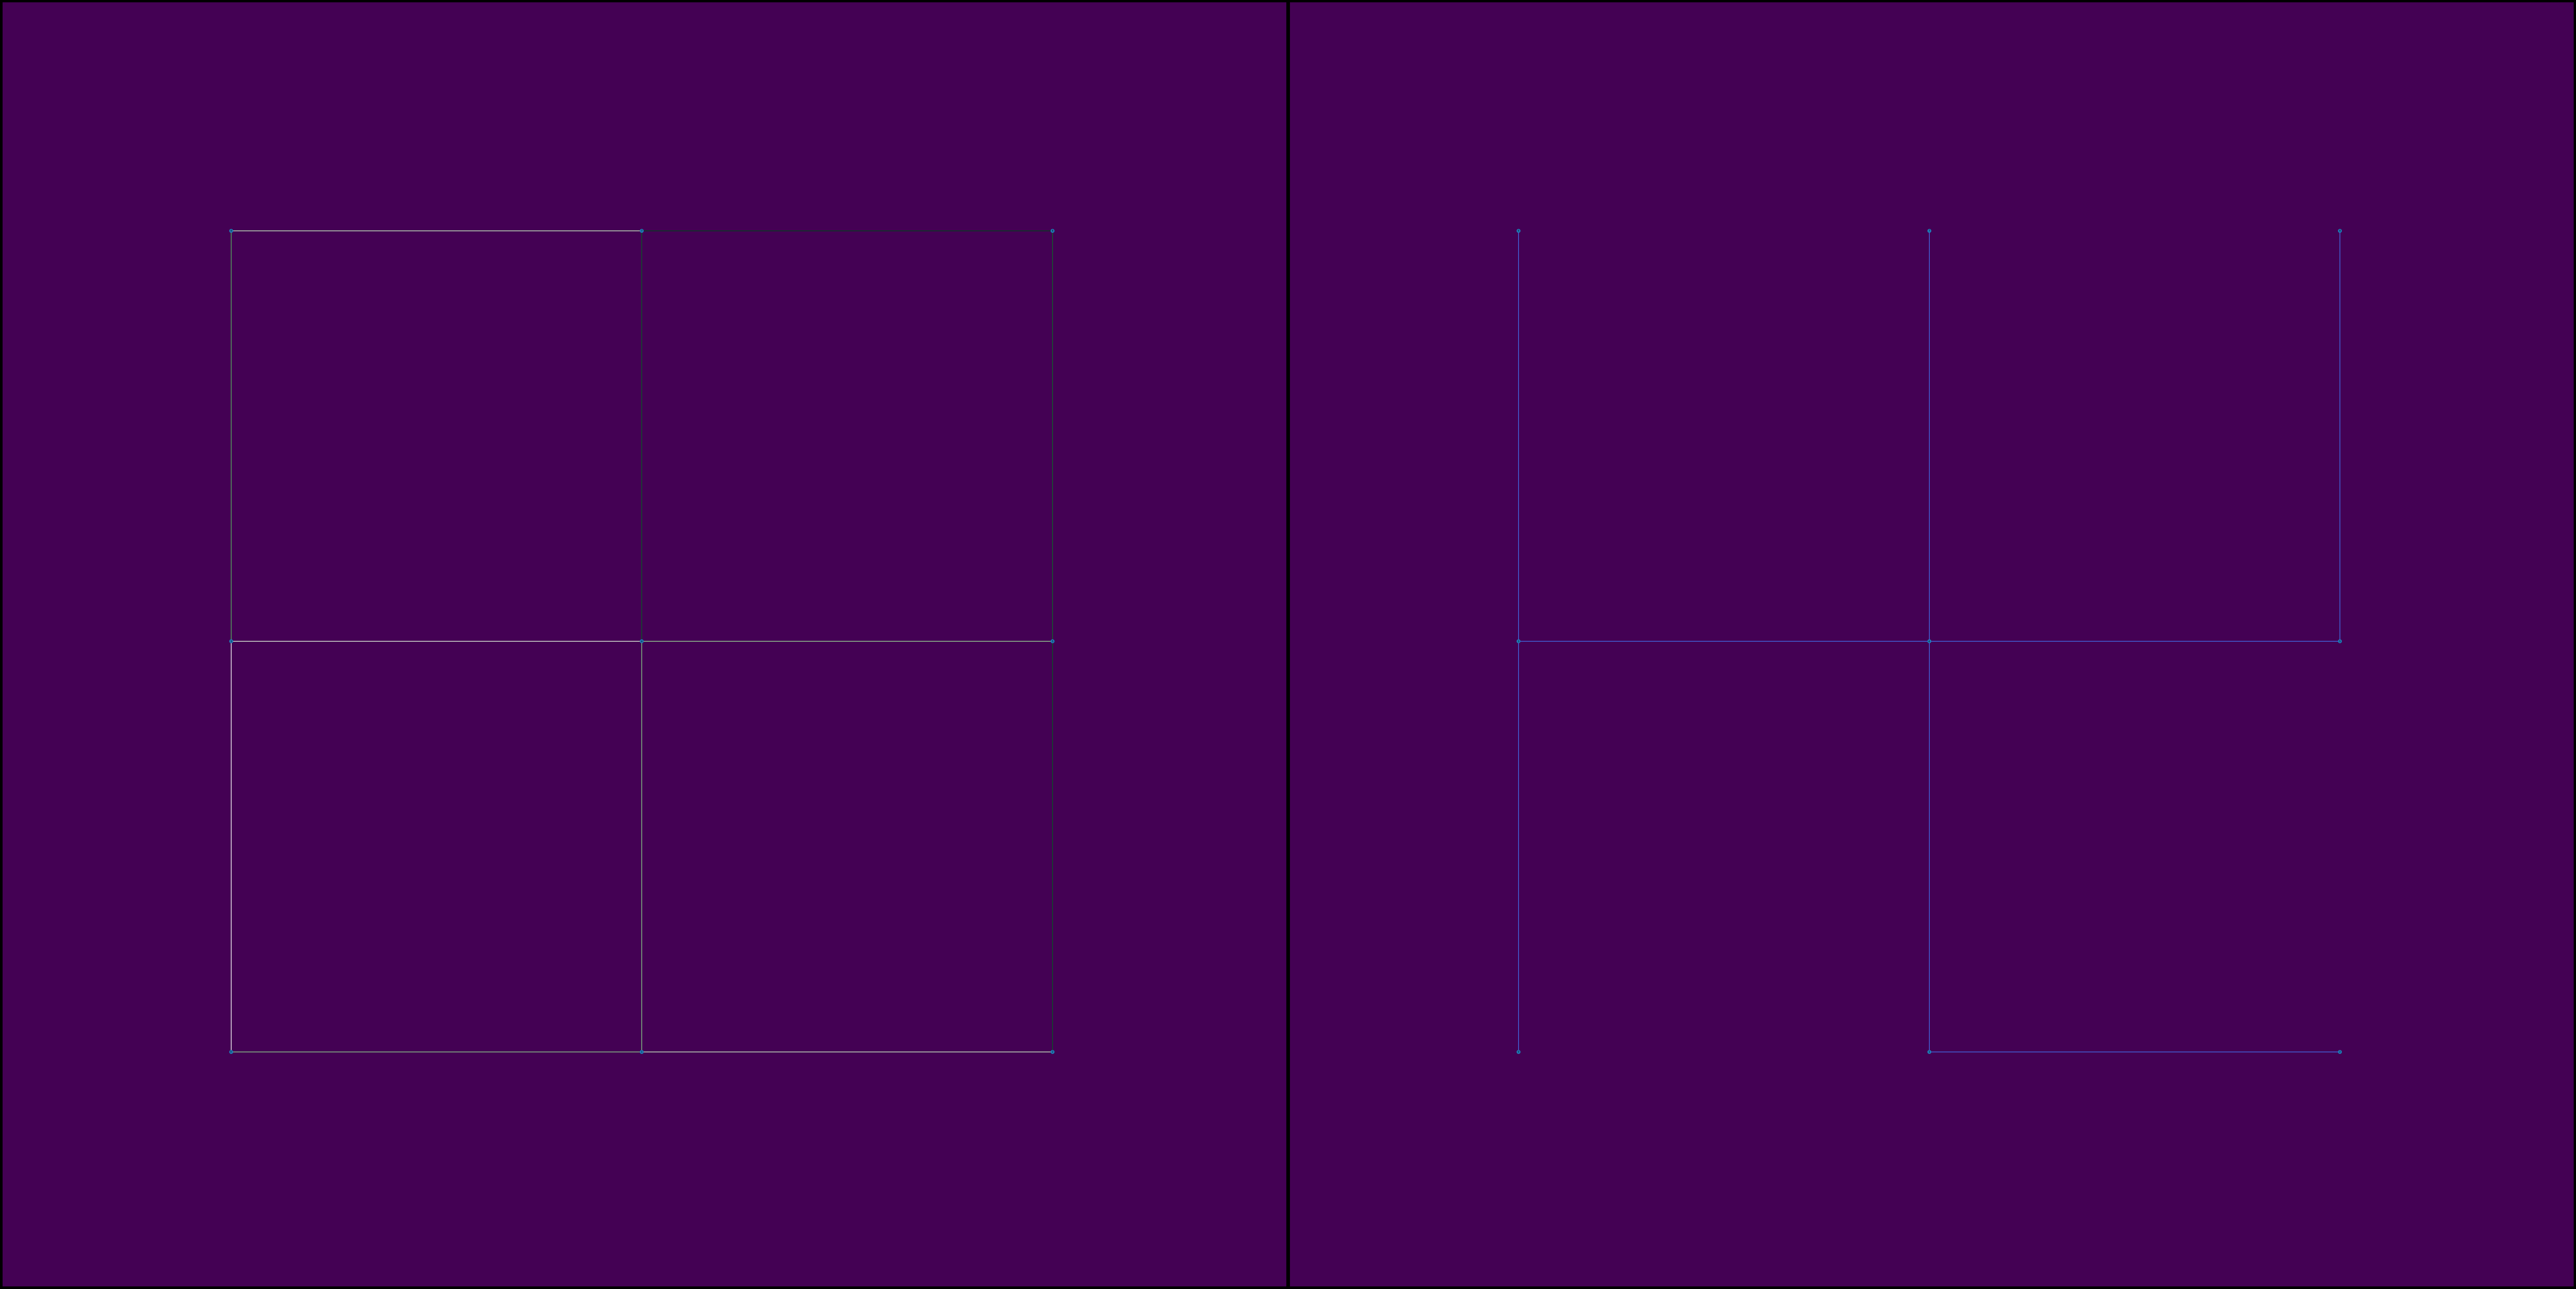

In [3]:
overlap = 0.1 #adjust in case your data was aquired with another overlap
row = str(2).zfill(2) #specify the row of the well you want to stitch
well = str(4).zfill(2) #specifc the well number you wish to stitch
zstack_value = str(1).zfill(3) #specify the zstack you want to stitch. for multiple zstacks please make a loop and iterate through each of them.
timepoint = str(1).zfill(3) #specifz the timepoint you wish to stitch

#define on which channel should be stitched
stitching_channel = "Alexa488"
output_filetype = [".tif"] #one of .tif, .ome.tif, .ome.zarr (can pass several if you want to generate all filetypes)

#create output directory if it does not exist
if not os.path.exists(outdir):
    os.makedirs(outdir)

pattern = f"Timepoint{timepoint}_Row{row}_Well{well}_{{channel}}_zstack{zstack_value}_r{{row:03}}_c{{col:03}}.tif"

generate_stitched(input_dir, 
                slidename,
                pattern,
                outdir,
                overlap,
                stitching_channel = stitching_channel, 
                filetype = output_filetype, 
                plot_QC = True)



## Visualize Stitching Output

(-0.5, 3037.5, 3039.5, -0.5)

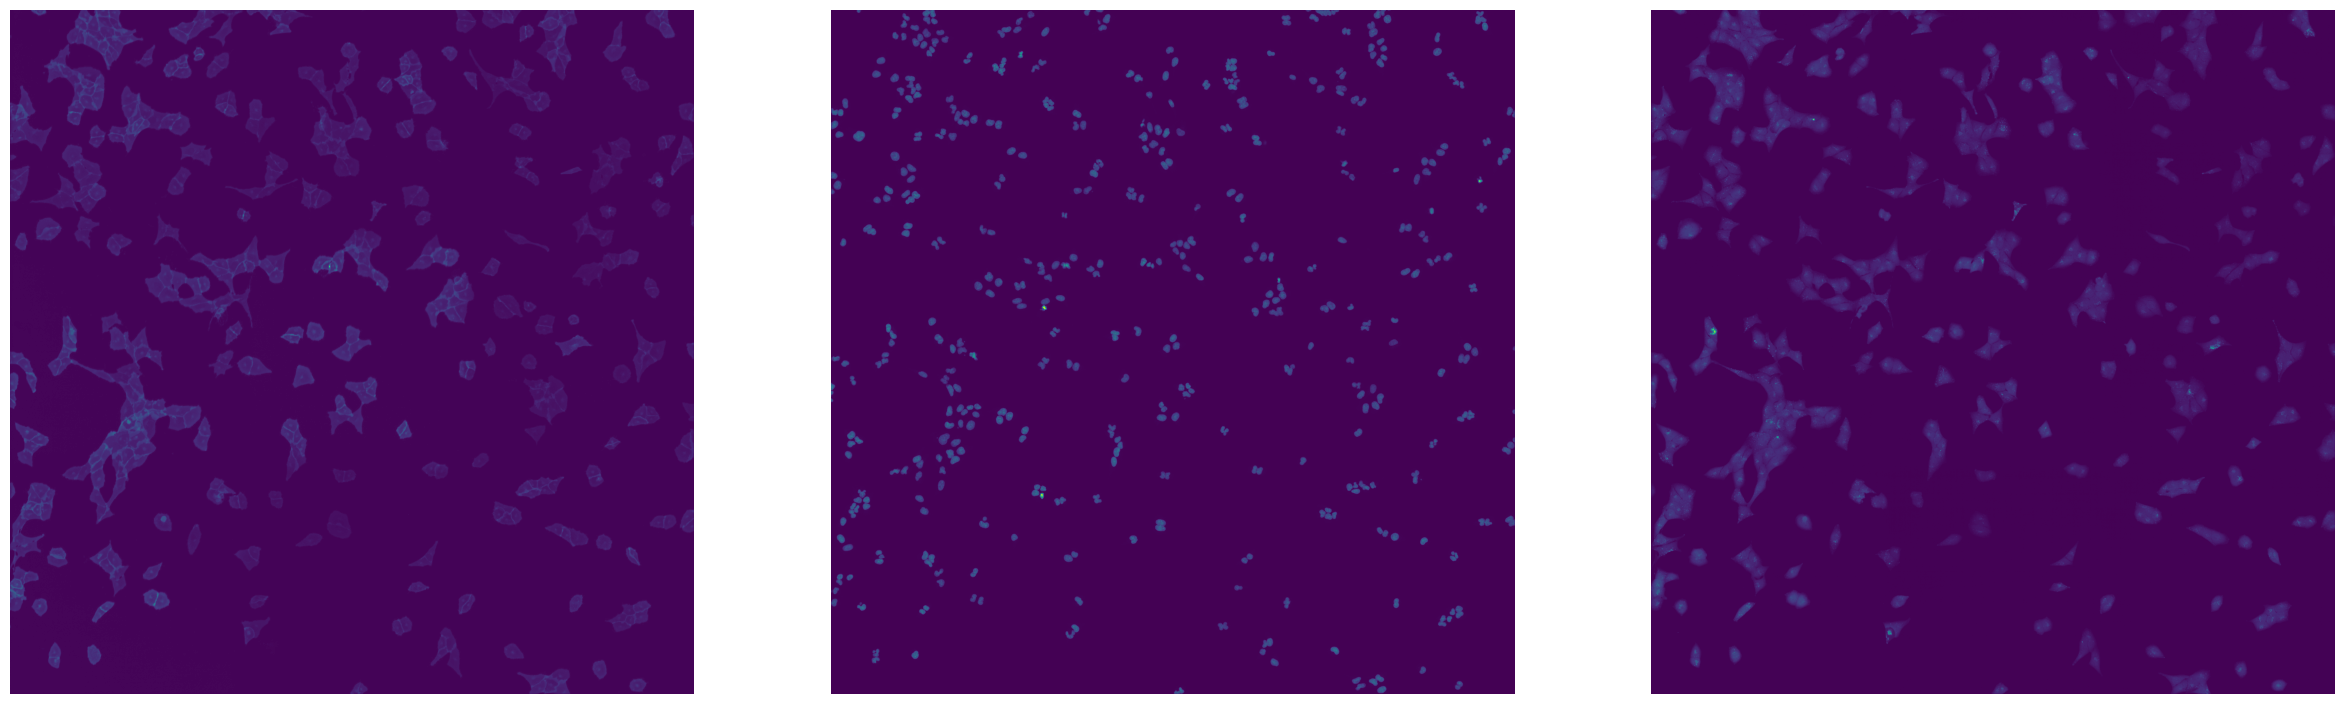

In [4]:
import matplotlib.pyplot as plt
from tifffile import imread

fig, axs = plt.subplots(1, 3, figsize = (30, 10))
axs[0].imshow(imread(f"{outdir}/stitching_test_Alexa488.tif"))
axs[0].axis("off")

axs[1].imshow(imread(f"{outdir}/stitching_test_DAPI.tif"))
axs[1].axis("off")

axs[2].imshow(imread(f"{outdir}/stitching_test_mCherry.tif"))
axs[2].axis("off")